### Algoritmos de Busca de Raízes

A busca por raízes de funções é uma tarefa fundamental em diversas áreas da matemática computacional e da ciência da computação. A necessidade de encontrar soluções para equações não lineares é essencial em aplicações que vão desde a engenharia até a física, economia e ciências biológicas.<br>
Este projeto se propõe a explorar e analisar diversos algoritmos utilizados na busca de raízes de funções. Através de métodos assim será possível compreender suas aplicações, vantagens e limitações em diferentes contextos.

Escolhi duas funções para analisar os algoritmos propostos : f(x) = x²+x e g(x) = sen(x) 

Assim, os pontos criticos são respectivamente -0.5 e π/2+2π*N , onde N é um número inteiro.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
g = lambda x : np.sin(x)
f = lambda x : x**2 + x

#### Algoritmo 1 (Intervalo Minimo)

- Este método é frequentemente utilizado para localizar o intervalo mais curto que contenha pelo menos um elemento específico dentro de um conjunto de elementos. A ideia central é percorrer os dados de maneira eficiente para encontrar o menor intervalo que atenda a um critério predefinido, podendo ser a presença de um valor específico, uma propriedade particular ou uma condição estabelecida

In [2]:
def intervalo_minimo(f, x=0, s=1e-2, k=2.0):
    a, ya = x, f(x)
    b, yb = a + s, f(a + s)
    i = 0
    if(yb > ya):
        a,b,ya,yb = b,a,ya,yb
        s = -s
    while (True):
        i+=1
        c, yc = b + s, f(b + s)
        if (yc > yb):
            if(a<c):
                return (a, c, i) 
            else:
                return(c, a, i)
        a,ya,b,yb = b,yb,c,yc
        s *= k

In [3]:
r = intervalo_minimo(f)
print("Os limites do intervalo encontrado foram",r[0],"e",r[1],"com",r[2],"interções")
print("O ponto minimo é -0.5")

Os limites do intervalo encontrado foram -1.27 e -0.31000000000000005 com 7 interções
O ponto minimo é -0.5


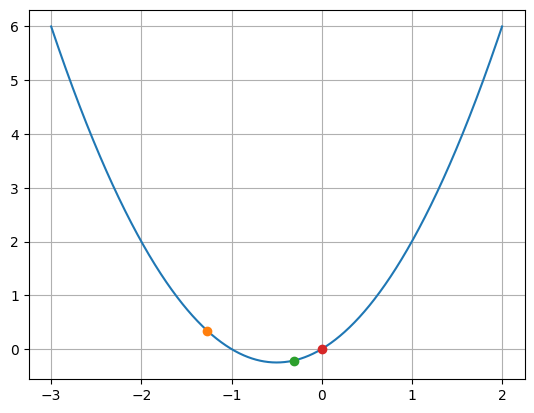

In [4]:
x = np.linspace(-3,2,1000)
plt.plot(x,f(x))
plt.plot(r[0],f(r[0]),marker = "o")
plt.plot(r[1],f(r[1]),marker = "o")
plt.plot(0,0,marker = "o")
plt.grid()

In [5]:
r = intervalo_minimo(g)
print("Os limites do intervalo encontrado foram",r[0],"e",r[1],"com",r[2],"interações")
print("O ponto minimo é",(-np.pi/2))

Os limites do intervalo encontrado foram -2.55 e -0.6300000000000001 com 8 interações
O ponto minimo é -1.5707963267948966


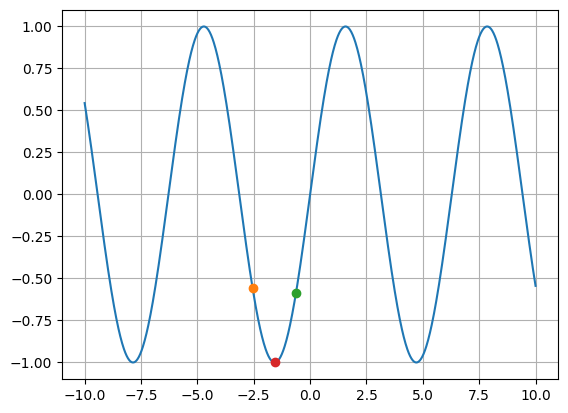

In [6]:
x = np.linspace(-10,10,1000)
plt.plot(x,g(x))
plt.plot(r[0],g(r[0]),marker = "o")
plt.plot(r[1],g(r[1]),marker = "o")
plt.plot(-(np.pi)/2,-1,marker = "o")
plt.grid()

#### Algoritmo 2 (Procura com Fibonnacci)

- A busca por Fibonacci é um método que utiliza a sequência de Fibonacci para otimizar buscas em conjuntos de dados ordenados. Esse algoritmo é conhecido por sua eficiência na busca de elementos, especialmente em estruturas de dados ordenadas, como arrays ou listas.Ao contrário de métodos convencionais, como a busca binária, a busca por Fibonacci não divide o conjunto de dados uniformemente. Em vez disso, ela utiliza proporções baseadas na sequência de Fibonacci para determinar as posições a serem verificadas. 

In [7]:
def busca_fibonacci(f, a, b, n, e=0.01):
    s = (1-np.sqrt(5))/(1+np.sqrt(5))
    fibonacci = (1+np.sqrt(5))/2
    p = 1 / (fibonacci*(1-np.power(s, n+1))/(1-np.power(s, n)))
    d = p*b + (1-p)*a
    yd = f(d)
    for i in range(1, n):
        if (i == n-1):
            c = e*a +(1-e)*d
        else:
            c = p*a +(1-p)*b
        yc = f(c)
        if(yc < yd):
            b, d, yd = d, c, yc
        else:
            a, b = b, c
        p = 1 / (fibonacci*(1-np.power(s, n-i+1))/(1-np.power(s, n-i)))
    if(a < b):
        return (a, b) 
    else:
        return(b, a)

In [8]:
r = busca_fibonacci(f,-1,1,7)
print("Os limites do intervalo encontrado foram",r[0],"e",r[1])
print("O ponto minimo é -0.5")

Os limites do intervalo encontrado foram -0.5238095238095238 e -0.4285714285714285
O ponto minimo é -0.5


O metodo de Fibonacci é mais efeciente neste caso encontra um intervalo mais proximo no mesmo numero de interções. 

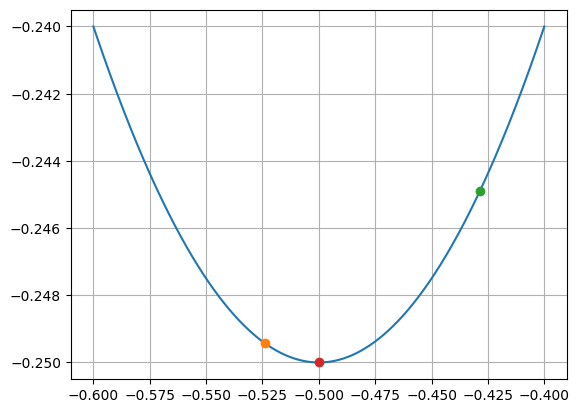

In [9]:
x = np.linspace(-0.4,-0.6,100000)
plt.plot(x,f(x))
plt.plot(r[0],f(r[0]),marker = "o")
plt.plot(r[1],f(r[1]),marker = "o")
plt.plot(-0.5,f(-0.5),marker = "o")
plt.grid()

Elevando o numero de intereções 

In [10]:
r = busca_fibonacci(f,-1,1,100)
print("Os limites do intervalo encontrado foram",r[0],"e",r[1])
print("O ponto minimo é -0.5")

Os limites do intervalo encontrado foram -0.5000000008346205 e -0.5000000008346204
O ponto minimo é -0.5


É possível ver um erro na aproximação, o intervalo passa pelo ponto mínimo devido a serem números muito proximos o valor do intervalo tende ao 0 e os limites tendem a -0.5.

In [11]:
r =busca_fibonacci(g,-1,1,8)
print("Os limites do intervalo encontrado foram",r[0],"e",r[1])
print("O ponto minimo é",(-np.pi)/2)

Os limites do intervalo encontrado foram -1 e -0.9411764705882353
O ponto minimo é -1.5707963267948966


Ocorre um erro pois o metodo é adequado para achar apenas uma raíz.

#### Algoritmo 3 (Busca da Razão Áurea)

- A razão áurea, representada pelo número φ (aproximadamente 1,618), possui propriedades especiais na matemática e na natureza. Na busca utilizando a razão áurea, a ideia é dividir o intervalo de busca proporcionalmente de acordo com a razão áurea.
- O algoritmo começa estabelecendo dois pontos iniciais no conjunto ordenado. Em seguida, utiliza a proporção áurea para calcular dois novos pontos dentro do intervalo inicial. Ele avalia o elemento presente nesses novos pontos e decide em qual subintervalo a busca deve continuar, mantendo a proporção áurea para definir os próximos pontos de verificação.

In [12]:
def busca_razao_aurea(f, a, b, n):
    p = 0.618 
    d = p * b + (1 - p) * a
    yd = f(d)
    for i in range(1, n):
        c = p * a + (1 - p) * b
        yc = f(c)
        if yc < yd:
            b, d, yd = d, c, yc
        else:
            a, b = b, c
    if(a < b):
        return (a, b)
    else: 
        return (b, a)

In [13]:
r = busca_razao_aurea(f,-1,1,7)
print("Os limites do intervalo encontrado foram",r[0],"e",r[1])
print("O ponto minimo é -0.5")

Os limites do intervalo encontrado foram -0.527848 e -0.416362064
O ponto minimo é -0.5


Foi obtido um resultado muito proxímo ao pelo método de Fibonacci.

In [14]:
r = busca_razao_aurea(g,-1,1,8)
print("Os limites do intervalo encontrado foram",r[0],"e",r[1])
print("O ponto minimo é",-np.pi/2)

Os limites do intervalo encontrado foram -1 e -0.9311016915520001
O ponto minimo é -1.5707963267948966


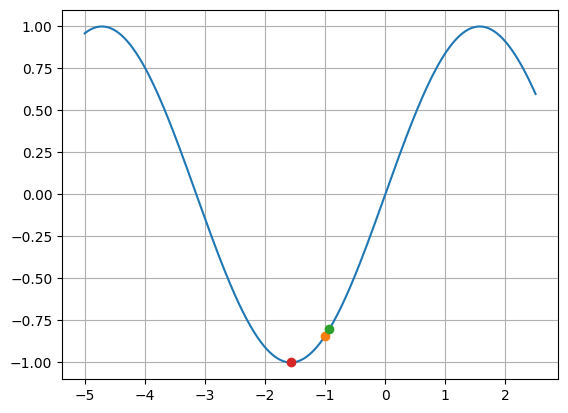

In [15]:
x = np.linspace(-5,2.5,1000)
plt.plot(x,g(x))
plt.plot(r[0],g(r[0]),marker = "o")
plt.plot(r[1],g(r[1]),marker = "o")
plt.plot(-(np.pi)/2,-1,marker = "o")
plt.grid()

Um problema foi encontrado no teste com uma função com multiplas raízes nos métodos com Fibonacci e a Busca Áurea,pois são mais eficientes em funções unimodais.

#### Algoritmo 4 (Pesquisa de ajuste quadrático)

- A pesquisa de ajuste quadrático é um método utilizado para encontrar o ponto mínimo ou máximo de uma função por meio de uma aproximação quadrática local. Esse método é comumente utilizado em otimização e pode ser aplicado quando não é possível usar métodos de derivadas devido à complexidade da função ou à falta de informações sobre sua derivada. Basicamente, a pesquisa de ajuste quadrático envolve a criação de uma função quadrática que se ajusta a pontos próximos ao ponto de interesse na função original. Para encontrar o ponto mínimo ou máximo, o algoritmo utiliza essa função quadrática para estimar onde a derivada da função original é igual a zero, o que indica um ponto de mínimo ou máximo.

In [16]:
def busca_ajuste_quadratico(f, a, b, c, n):
    ya, yb, yc = f(a), f(b), f(c)
    for i in range(n-3):
        x = 0.5 * (ya * (b**2-c**2) + yb * (c**2-a**2) + yc * (a**2-b**2))/(ya * (b-c) + yb * (c-a) + yc * (a-b))
        yx = f(x)
        if (x > b):
            if (yx > yb):
                c, yc = x, yx
            else:
                a, ya, b, yb = b, yb, x, yx
        elif (x < b):
            if (yx > yb):
                a, ya = x, yx
            else:
                c, yc, b, yb = b, yb, x, yx
    return (a, b, c)

In [17]:
r = busca_ajuste_quadratico(f,-5,0,5,10)
print("O ponto encontrado foi",r[1])
print("O ponto minimo é -0.5")

O ponto encontrado foi -0.5
O ponto minimo é -0.5


O metódo consegue achar o ponto com exatido, porem se for testado com uma função com multiplas raízes...

In [18]:
r = busca_ajuste_quadratico(g,-5,0,5,10)
print("Os limites do intervalo encontrado foram",r[0],"e",r[1],r[2])
print("O ponto minimo é",-np.pi/2)

Os limites do intervalo encontrado foram -5 e -inf 0
O ponto minimo é -1.5707963267948966


/tmp/ipykernel_41775/803324838.py:4: RuntimeWarning: divide by zero encountered in scalar divide
  x = 0.5 * (ya * (b**2-c**2) + yb * (c**2-a**2) + yc * (a**2-b**2))/(ya * (b-c) + yb * (c-a) + yc * (a-b))
/tmp/ipykernel_41775/1839792022.py:3: RuntimeWarning: invalid value encountered in sin
  g = lambda x : np.sin(x)
/tmp/ipykernel_41775/803324838.py:4: RuntimeWarning: invalid value encountered in scalar multiply
  x = 0.5 * (ya * (b**2-c**2) + yb * (c**2-a**2) + yc * (a**2-b**2))/(ya * (b-c) + yb * (c-a) + yc * (a-b))


Ocorre um erro pois é um método unimodal,porem pode ser usado delimitando o intervalo.

In [19]:
r = busca_ajuste_quadratico(g,-4,-2,1,5)
print("Os limites do intervalo encontrado foram",r[0],"e",r[2],"com o do ponto crítico de",r[1])
print("O ponto minimo é",-np.pi/2)

Os limites do intervalo encontrado foram -2 e -1.4528372296846792 com o do ponto crítico de -1.529883570798133
O ponto minimo é -1.5707963267948966


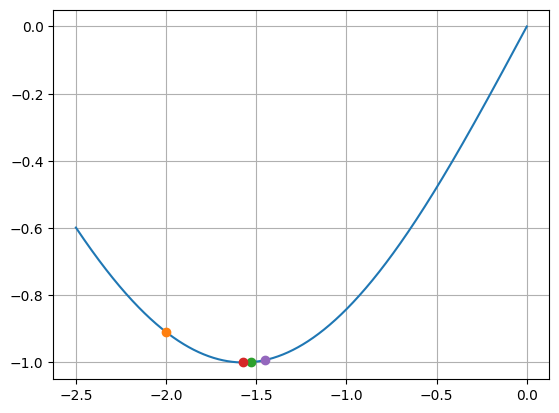

In [20]:
x = np.linspace(-2.5,0,1000)
plt.plot(x,g(x))
plt.plot(r[0],g(r[0]),marker = "o")
plt.plot(r[1],g(r[1]),marker = "o")
plt.plot(-(np.pi)/2,-1,marker = "o")
plt.plot(r[2],g(r[2]),marker = "o")
plt.grid()

#### Algoritmo 6 (Método da bisseção)

- O método da bisseção é um dos métodos mais simples e robustos para encontrar raízes de uma função. Ele é aplicável quando há uma mudança de sinal da função em um intervalo, indicando a existência de uma raiz nesse intervalo. Ele opera dividindo iterativamente um intervalo no qual a função muda de sinal ao meio e verificando em qual metade a raiz está localizada. O processo é repetido até que a raiz seja encontrada dentro de uma tolerância aceitável.

In [28]:
def bissecao(f, count, a, b, eps=0.001):
    if f(a) * f(b) > 0:
        print("Esse intervalo não apresenta as condições para usar o método. O intervalo deve obedecer F(a)*F(b) <= 0")
        return None
    i = 0
    x = (a + b) * 0.5
    while i <= count:
        if abs(f(x)) < eps:
            return x
        if f(x) * f(b) < 0:
            a = x
        else:
            b = x
        x = (a + b) * 0.5
        i += 1
    return x

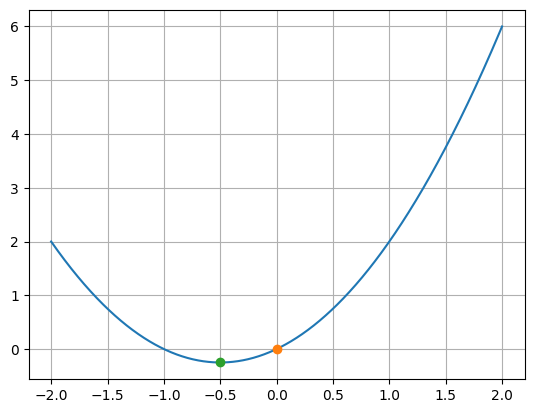

In [45]:
r = bissecao(f,10,-1,1)
x = np.linspace(-2,2,1000)
plt.plot(x,f(x))
plt.plot(r,f(r),marker = "o")
plt.plot(-0.5,f(-0.5),marker = "o")
plt.grid()